# Prediction of Wages based on past data

We first import the relevant libraries, import the data and check if everything looks correct.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Average Wage.csv", sep = ",", encoding = "ANSI")

target = "Average monthly salary in the municipalities"
df.head(20)

,sex,region,year,Average monthly salary in the municipalities
0,men,00 Sweden,2007,23500
1,men,00 Sweden,2008,24700
2,men,00 Sweden,2009,25400
3,men,00 Sweden,2010,25700
4,men,00 Sweden,2011,26300
5,men,00 Sweden,2012,26900
6,men,00 Sweden,2013,27700
7,men,00 Sweden,2014,28400
8,men,00 Sweden,2015,29000
9,men,00 Sweden,2016,29700


In [2]:
df.describe(include = 'all')

,sex,region,year,Average monthly salary in the municipalities
count,12264,12264,12264.000000,12264.000000
unique,3,292,NaN,NaN
top,men,00 Sweden,NaN,NaN
freq,4088,42,NaN,NaN
mean,NaN,NaN,2013.500000,27019.553164
std,NaN,NaN,4.031293,3158.781713
min,NaN,NaN,2007.000000,19700.000000
25%,NaN,NaN,2010.000000,24600.000000
50%,NaN,NaN,2013.500000,26800.000000
75%,NaN,NaN,2017.000000,29500.000000


After importing the data and looking at the summary, we know the following about our data.

1. It has 12264 rows and 4 columns
2. There are three unique sexes ("men", "women", "total")
3. There are 292 unique regions
4. Year goes from 2007 - 2020
5. Salary ranges from 19700 - 38100

Let's now take a deeper look at the data.

## Looking at the data
The goal is to see how the data behaves in order to build an accurate prediction model about the future. First we plot the Region 00 Sweden, to see: 
1. How the general trend looks like.
2. If there is a difference between the sexes.



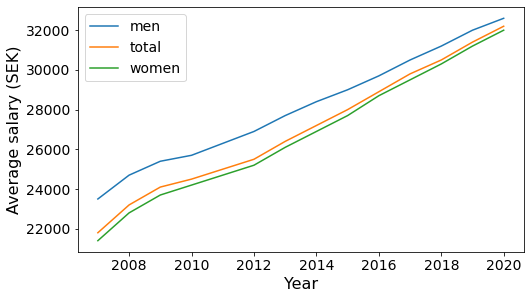

In [3]:
from matplotlib import pyplot as plt
golden = [8, 4.5]

fig,ax = plt.subplots(figsize = golden)

df_Sweden = df.loc[df.region == "00 Sweden"]

df_Sweden.loc[df_Sweden.sex == "men"].plot(x="year", y = target, ax = ax)

df_Sweden.loc[df_Sweden.sex == "total"].plot(x="year", y = target, ax = ax)
df_Sweden.loc[df_Sweden.sex == "women"].plot(x="year", y = target, ax = ax)

ax.legend(["men", "total", "women"], fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_ylabel("Average salary (SEK)", size = 16)
ax.set_xlabel("Year", size = 16)
ax.figure.savefig("TotalSwedenSalary.pdf")

### Result

1. The wages go up in a quite linear fassion. 
2. There is a salary gap between men and women, but it is getting closer.

## Deeper look

We assume that the salaries of men and women is getting closer. During prediction we have to be careful, since we can not use the data (Stockholm, 2020, men) to predict (Stockholm, 2020, women), since the data will not be available in the future. To prevent running into this issue, we simplify this problem by just removing the *sex* column. We can justify this, since the wagegap seems to grow close enough so the different genders won't matter in the future.




In [4]:
df = df.loc[df.sex == "total"]
df = df.drop(["sex"], axis = 1)
df.reset_index(inplace = True)

We will now plot the Municipalities with 
* The highest salary in 2020
* The lowest salary in 2020
* The highest salary in 2008 
* Borlänge
* Stockholm

These will be probably the most interesting municipalities. In the background we will plot the average salaries of all the other municipalities in grey.

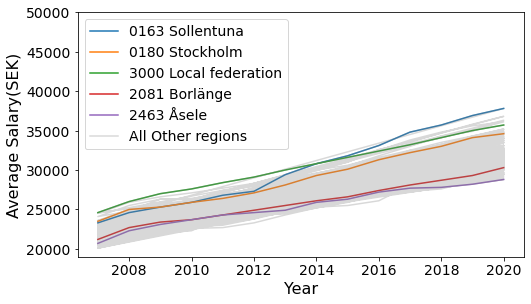

In [5]:
max_2020 = df.iloc[df[target].idxmax()]
min_2020 = df.iloc[df.loc[df.year == 2020][target].idxmin()]

min_2008 = df.iloc[df[target].idxmin()]
max_2008 = df.iloc[df.loc[df.year == 2008][target].idxmax()]

stockholm = df.loc[df.region.str.contains("Stockholm")].iloc[0]
borlänge = df.loc[df.region.str.contains("Borlänge")].iloc[0]
sollentuna_men = df.loc[df.region.str.contains("Sollentuna")].iloc[0]

value_list = [max_2020, stockholm, max_2008, borlänge, min_2020]

fig,ax = plt.subplots(figsize = golden)


for val in value_list:
    df_tmp = df.loc[df.region == val.region]
    df_tmp.plot(x = "year", y = target,ax = ax)

df.plot(x = "year", y = target,ax = ax, alpha = 0.3, color = "grey")
ax.legend([val.region for val in value_list] + ["All Other regions"], fontsize = 14)
ax.set_ylabel("Average Salary(SEK)", size = 16)
ax.set_xlabel("Year", size = 16)
plt.ylim([19000, 50000])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

fig.savefig("Wages_Regions.pdf")

### Result
The municipalities all show a general linear trend which we can use for the prediction. We can see some differences though, for example. Local federation was highest in 2007 but was surpassed by Sollentuna was highest in 2020.

## Data preparation
We first need to prepare and clean the data for further processing. 
1. Check NA-Values
2. One-Hot encoding for region


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   index                                         4088 non-null   int64 
 1   region                                        4088 non-null   object
 2   year                                          4088 non-null   int64 
 3   Average monthly salary in the municipalities  4088 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 127.9+ KB


We find no NA-Values

### One-Hot Encoding
The column *region* is a categorical varible and must therefore be encoded to give an accurate prediction. We use `pd.get_dummies` for that

In [7]:

target = "Average monthly salary in the municipalities"
X = df.drop([target], axis = 1)
y = df[[target]]

X_enc = pd.get_dummies(X, columns = ["region"])


In [8]:
X_enc.head()

,index,year,region_00 Sweden,region_0114 Upplands Väsby,region_0115 Vallentuna,region_0117 Österåker,region_0120 Värmdö,region_0123 Järfälla,region_0125 Ekerö,region_0126 Huddinge,...,region_2518 Övertorneå,region_2521 Pajala,region_2523 Gällivare,region_2560 Älvsbyn,region_2580 Luleå,region_2581 Piteå,region_2582 Boden,region_2583 Haparanda,region_2584 Kiruna,region_3000 Local federation
0,8176,2007,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8177,2008,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8178,2009,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8179,2010,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8180,2011,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Fit the Model
The data is now ready for modelling. We want to fit a Linear Regression to predict the data. We fit a Decision Tree and a Random Forest as well. This is to compare CV-Scores in the end so we can deduce how good our model really is.

1. Linear Regression
2. Decision Tree


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

scores = cross_val_score(clf, X_enc, y, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.04


In [10]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
scores = cross_val_score(clf, X_enc, y, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.06


The Decision Tree does slightly better on the Cross-Validation, but the Linear Regression model seems still good. Let's see if Random Forest might be even better.

In [11]:
from sklearn.ensemble import RandomForestRegressor
# Takes around 20seconds on my Laptop, but might take longer
# n_jobs to use full parallelization
# sets a seed so results are reproducable
clf = RandomForestRegressor(verbose = True, random_state = 0xbeef, n_jobs = -1)
scores = cross_val_score(clf, X_enc, (y).values.ravel(), cv = 3)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]:

0.91 accuracy with a standard deviation of 0.02


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Performs as good as Linear Regression but with lower standard deviance.

## Hyperparameter Tuning
We can do better by adjusting the Parameters via Hyperparameter tuning, since our model should be at least as good as a Decision tree.

To do that we first use RandomSearch to find some basic values then GridSearch to really narrow it down.

### RandomSearch
First creating a parameter grid

In [12]:
### This block takes around 30 minutes to run
#from sklearn.model_selection import RandomizedSearchCV
#
#n_estimators = list(range(50, 401, 50)) # Number of trees
#max_depth = list(range(10, 111, 10)) # How deep the tree is
#max_depth.append(None)
#
#param_distributions = {'n_estimators': n_estimators,
#              'max_depth': max_depth}
#
#rf_random = RandomizedSearchCV(clf, param_distributions, n_iter = 10, cv = 3,
#                              verbose = 2)
#rf_random.fit(X_enc, y.values.ravel())
#

Best Parameters found:

In [13]:
#rf_random.best_params_

**Result:** Best Parameters {'n_estimators': 150, 'max_depth': 100}

### Grid Search

To build on that model, we do Grid Search, to tune the parameters even more, since this code takes a long time to run, it has been commented out.

In [14]:
#from sklearn.model_selection import GridSearchCV
#
#param_grid = {
#    'n_estimators': list(range(100, 201, 10)),
#    'max_depth': [80,90,100,110,120]
#}
#
#grid_search = GridSearchCV(clf, param_grid, cv = 3)
#grid_search.fit(X_enc, y.values.ravel())
#grid_search.best_params_

In [15]:
#grid_search.best_params_

**Result**

Grid search best parameters:
{'max_depth': 120, 'n_estimators': 180}

### Optimized Random Forest
Result of optimized random forest

In [16]:

clf = RandomForestRegressor(verbose = True, max_depth = 120, n_estimators = 180, random_state = 0xbeef, n_jobs = -1)
scores = cross_val_score(clf, X_enc, (y).values.ravel(), cv = 3)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]:

0.91 accuracy with a standard deviation of 0.02


The model did not improve by a lot, we therefore conclude that Linear Regression should give accurate results.

## Make predictions

We create the dataset for the "future" This is just our current X but with years += 14.




In [17]:
X_future = df.drop([target], axis = 1)
X_future.year += 14
X_future.head()


,index,region,year
0,8176,00 Sweden,2021
1,8177,00 Sweden,2022
2,8178,00 Sweden,2023
3,8179,00 Sweden,2024
4,8180,00 Sweden,2025


Let's fit our model!

In [18]:
X_future_enc = pd.get_dummies(X_future, columns = ["region"])
model = LinearRegression().fit(X_enc, y)
y_future = model.predict(X_future_enc)
result = X_future.copy()
result[target] = y_future
result.head()

,index,region,year,Average monthly salary in the municipalities
0,8176,00 Sweden,2021,32642.831090
1,8177,00 Sweden,2022,33389.724813
2,8178,00 Sweden,2023,34136.618536
3,8179,00 Sweden,2024,34883.512259
4,8180,00 Sweden,2025,35630.405981


We now concatenate the predictions with the historical values to make a nice prediction plot. This is also a sanity check to see if something went wrong somewhere:

In [19]:
df_all = pd.concat([df, result], axis = 0)
df_all.drop(["index"], axis = 1, inplace = True)
df_all.tail()

,region,year,Average monthly salary in the municipalities
4083,3000 Local federation,2030,42722.017452
4084,3000 Local federation,2031,43468.911175
4085,3000 Local federation,2032,44215.804897
4086,3000 Local federation,2033,44962.698620
4087,3000 Local federation,2034,45709.592343


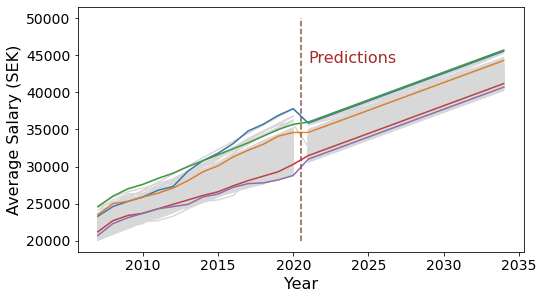

In [20]:
max_2034 = df_all.iloc[df_all[target].idxmax()]
min_2034 = df_all.iloc[df_all.loc[df_all.year == 2034][target].idxmin()]

min_2008 = df_all.iloc[df_all[target].idxmin()]
max_2008 = df_all.iloc[df_all.loc[df_all.year == 2008][target].idxmax()]

stockholm = df_all.loc[df_all.region.str.contains("Stockholm")].iloc[0]
borlänge = df_all.loc[df_all.region.str.contains("Borlänge")].iloc[0]

value_list = [max_2020, stockholm, max_2008, borlänge, min_2020]

fig,ax = plt.subplots(figsize = golden)


for val in value_list:
    df_all_tmp = df_all.loc[df_all.region == val.region]
    df_all_tmp.plot(x = "year", y = target,ax = ax)

df_all.plot(x = "year", y = target,ax = ax, alpha = 0.3, color = "grey")

ax.get_legend().remove()
ax.set_ylabel("Average Salary (SEK)", size = 16)
ax.set_xlabel("Year", size = 16)

# Add Prediction line
line_X = [2020.5,2020.5]
line_Y = [20000, 50000] 
plt.plot(line_X, line_Y, '--' )

# 
plt.text(2021, 44000, "Predictions", c = "brown", size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
fig.savefig("Wages_prediction_df_all.pdf")

Where are the highest wages in 2027?

In [21]:
result_5 = result.loc[result.year == 2027]
print(result_5.sort_values(target,ascending = False).head(10).to_string(index = False))

 index                region  year  Average monthly salary in the municipalities
 12256 3000 Local federation  2027                                  40481.336284
  8378             0160 Täby  2027                                  40374.193427
  8406       0163 Sollentuna  2027                                  40338.479141
  8448            0182 Nacka  2027                                  40088.479141
  8196   0114 Upplands Väsby  2027                                  39467.050570
  8392         0162 Danderyd  2027                                  39359.907712
  9568         1233 Vellinge  2027                                  39324.193427
  8476            0184 Solna  2027                                  39231.336284
  8420        0180 Stockholm  2027                                  39081.336284
  8490          0186 Lidingö  2027                                  38824.193427
